You are a data analyst for a car dealership in Quebec, Canada. The business runs on a standard business model for retail: buy cars from a manufacturer at a low price and then sell those cars to individual customers at higher prices. Every month, the business decides how many cars to order from the manufacturer. If you order too many cars, you’ll be unable to sell them all quickly, resulting in high storage costs or cash flow problems. If you order too few cars, you won’t be able to meet your customers’ demands. Ordering the right number of cars is important. But what is the right number?. We need to forecast the demand and place an order based on our forecast.

In [1]:
import pandas as pd
import numpy as np

In [2]:
car_sales = pd.read_csv('carsales.csv')
car_sales


,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [3]:
car_sales.describe()


,Monthly car sales in Quebec 1960-1968
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [6]:
car_sales.columns = ['month', 'sales']
car_sales

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [9]:
#Clean the last row that contains no data
car_sales = car_sales.loc[0:107, :].copy()
car_sales.tail()

,month,sales,period
103,1968-08,16722.0,103
104,1968-09,14385.0,104
105,1968-10,21342.0,105
106,1968-11,17180.0,106
107,1968-12,14577.0,107


In [10]:
car_sales['period'] = list(range(108))

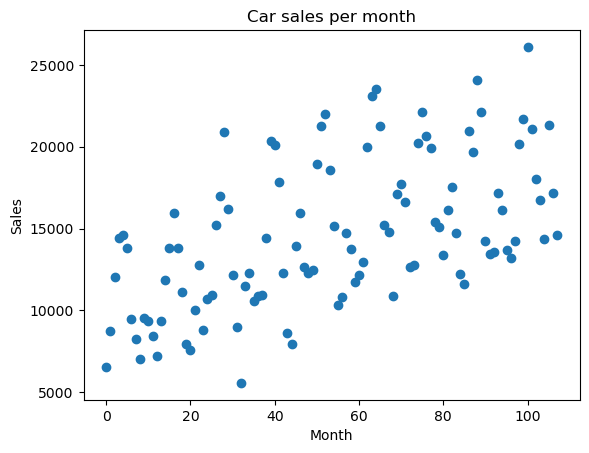

In [12]:
#Plotting the data
import matplotlib.pyplot as plt
plt.scatter(car_sales['period'], car_sales['sales'])
plt.title("Car sales per month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

From the plot, Sales tend to increase over time

In [20]:
x = car_sales['period']
x

0        0
1        1
2        2
3        3
4        4
      ... 
103    103
104    104
105    105
106    106
107    107
Name: period, Length: 108, dtype: int64

In [21]:
y = car_sales['sales']
y

0       6550.0
1       8728.0
2      12026.0
3      14395.0
4      14587.0
        ...   
103    16722.0
104    14385.0
105    21342.0
106    17180.0
107    14577.0
Name: sales, Length: 108, dtype: float64

In [22]:
print("The correlation of the two variables is: ", x.corr(y))

The correlation of the two variables is:  0.5620368608323554


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1, 1)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
print(lr.coef_)
print(lr.intercept_)

[82.26943854]
10225.638021973604


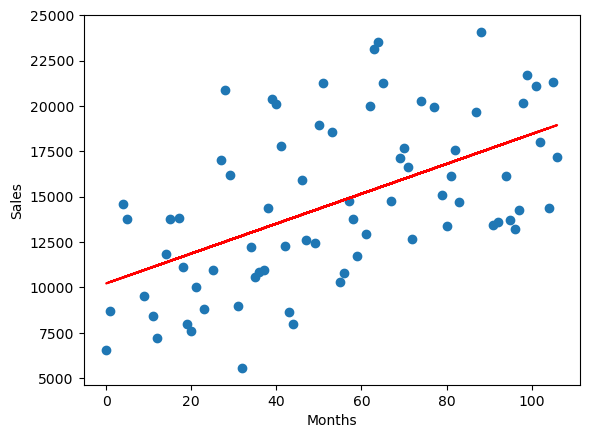

In [30]:
y_pred_train = lr.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'red')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

In [32]:
y_test_pred = lr.predict(x_test)
score = lr.score(x_test, y_test)
score

0.35550499414764514

In [36]:
x_extend = np.append(car_sales['period'], np.arange(108, 120))
x_extend = x_extend.reshape(-1, 1)
extend_pred = lr.predict(x_extend)
#Predict sales for the next one year
extend_pred

array([10225.63802197, 10307.90746052, 10390.17689906, 10472.44633761,
       10554.71577615, 10636.9852147 , 10719.25465324, 10801.52409179,
       10883.79353033, 10966.06296888, 11048.33240742, 11130.60184597,
       11212.87128451, 11295.14072306, 11377.4101616 , 11459.67960014,
       11541.94903869, 11624.21847723, 11706.48791578, 11788.75735432,
       11871.02679287, 11953.29623141, 12035.56566996, 12117.8351085 ,
       12200.10454705, 12282.37398559, 12364.64342414, 12446.91286268,
       12529.18230123, 12611.45173977, 12693.72117832, 12775.99061686,
       12858.2600554 , 12940.52949395, 13022.79893249, 13105.06837104,
       13187.33780958, 13269.60724813, 13351.87668667, 13434.14612522,
       13516.41556376, 13598.68500231, 13680.95444085, 13763.2238794 ,
       13845.49331794, 13927.76275649, 14010.03219503, 14092.30163358,
       14174.57107212, 14256.84051067, 14339.10994921, 14421.37938775,
       14503.6488263 , 14585.91826484, 14668.18770339, 14750.45714193,
      

In [38]:
score = lr.score(x_extend, extend_pred)
score

1.0